In [ ]:
## seaborn 라이브러리 설치
!pip install seaborn

In [2]:
import pandas as pd 
import seaborn
import matplotlib.pyplot as plt

c:\Users\moons\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


1. drinks.csv 파일 로드 
2. 'beer_serving', 'sprit_serving', 'wine_serving', 'total_litres_of_pure_alcohol' 컬럼 데이터 간의 상관관계 출력
3. 행렬 히트맵 시각화
4. 국가별 술 소비량 대비 알콜 비율 컬럼 추가
5. 국가별 순위 시각화 하여 출력

In [3]:
drinks = pd.read_csv("../csv/drinks.csv")
drinks.head(1)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS


In [6]:
## 상관계수 행렬 생성
corr = drinks[
    ['beer_servings', 
    'spirit_servings', 
    'wine_servings', 
    'total_litres_of_pure_alcohol']].corr(method='pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


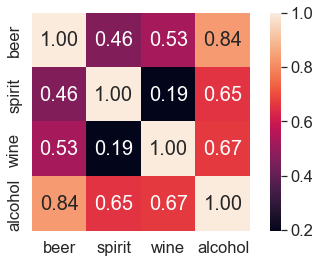

In [7]:
## 시각화 
cols_view = ['beer', 'spirit', 'wine', 'alcohol']

seaborn.set(font_scale=1.5)

hm = seaborn.heatmap(
    corr.values, 
    cbar = True, 
    annot = True, 
    square = True, 
    fmt = '.2f', 
    annot_kws= {'size' : 20}, 
    xticklabels= cols_view, 
    yticklabels= cols_view
)

plt.tight_layout()
plt.show()

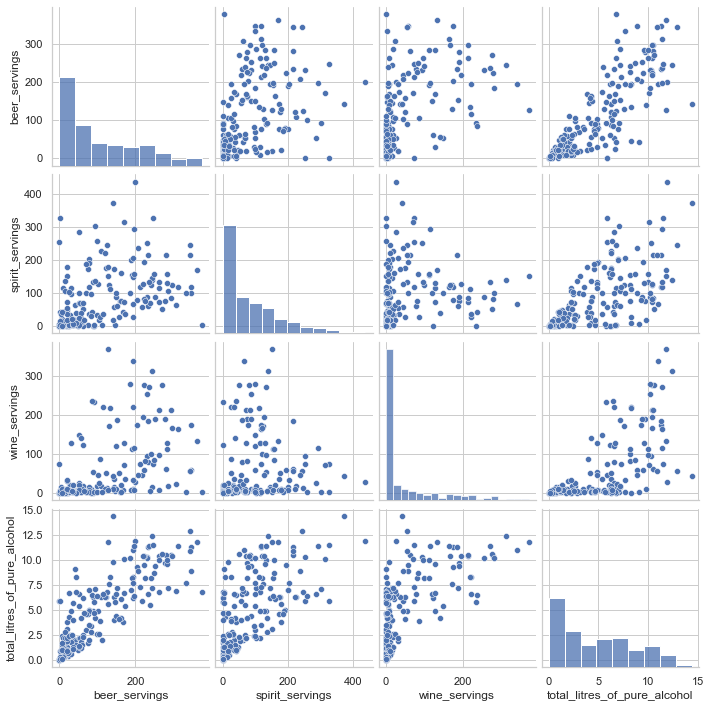

In [8]:
seaborn.set(style='whitegrid', context='notebook')
seaborn.pairplot(drinks[
    ['beer_servings', 
    'spirit_servings', 
    'wine_servings', 
    'total_litres_of_pure_alcohol']
], height=2.5)
plt.show()

In [9]:
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


In [14]:
## 파생변수 생성
## 총 술의 소비량(total_servings) = beer + spirit + wine
drinks["total_servings"] = drinks["beer_servings"] +\
     drinks["spirit_servings"] + drinks["wine_servings"]
# drinks.head(1)
## 술의 소비량 대비 알콜 비율 파생 변수 생성 (결측치 데이터는 0 대체)
## alcohol_rate = total_litres_of_pure_alcohol / total_servings
drinks["alcohol_rate"] = (drinks["total_litres_of_pure_alcohol"] /\
     drinks["total_servings"]).fillna(0)
drinks.head(1)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.0


In [21]:
## 나라별 독한 술 먹는 나라의 순위 출력
drinks_rank = drinks.sort_values('alcohol_rate', ascending=False)
drinks_rank = drinks_rank.loc[:, ['country', 'alcohol_rate']]
# drinks_rank[['country', 'alcohol_rate']]
## 우리나라(South Korea)는 몇위인가? --> 
# 오름차순 정렬, 인덱스 리셋, 필터링, 인덱스 값+1
drinks_rank.reset_index(drop=False, inplace=True)
drinks_rank[drinks_rank['country'] == 'South Korea'].index + 1
## 시각화 (바형 그래프 , 내림차순으로 정렬이 되어있는 데이터셋)

Int64Index([15], dtype='int64')

In [22]:
import numpy as np

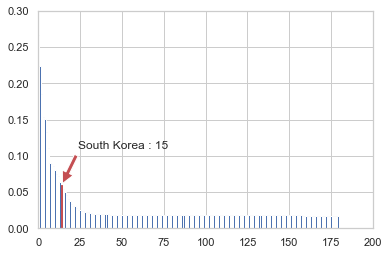

In [31]:
## alcohol_rate의 값을 바형 그래프 시각화
# x = drinks_rank.index
x = np.arange(len(drinks_rank))
y = drinks_rank['alcohol_rate']
## 국가 리스트
country_list = drinks_rank['country'].tolist()

bar_list = plt.bar(x, y)

## 그래프를 커스텀
bar_list[country_list.index('South Korea')].set_color('r')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alcohol_rate = drinks_rank[drinks_rank['country'] == 'South Korea']\
    ['alcohol_rate'].values[0]

plt.annotate('South Korea : ' + str(korea_rank + 1), 
            xy = (korea_rank, korea_alcohol_rate), 
            xytext = (korea_rank + 10, korea_alcohol_rate + 0.05), 
            arrowprops= dict(facecolor = 'r', shrink=0.05))


plt.show()